In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#READ CSV FILE
df = pd.read_csv("C:/Users/Tejas/Desktop/ST_project/Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [71]:
#GET BASIC INFO OF DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [72]:
#GET NUMBER OF ROWS AND COLUMNS 
num_rows,num_columns=df.shape

#PRINT RESULTS
print("Number of rows in airplane crashes and facilities dataset:", num_rows)
print("Number of columns in airplane crashes and facilities dataset:", num_columns)

Number of rows in airplane crashes and facilities dataset: 5268
Number of columns in airplane crashes and facilities dataset: 14


In [73]:
#NUMBER OF NULL VALUES
df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [74]:
#FILLING NULL VALUES OF TIME USING STARTIFIED PROBABILITY SAMPLING
import pandas as pd

# Step 1: Read and Parse CSV
df = pd.read_csv('C:/Users/Tejas/Desktop/ST_project/Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Sort Data by Date
df_sorted = df.sort_values(by='Date')

data = {}

for month in df_sorted['Date'].dt.month.unique():
    # Filter data for the current month
    month_data = df_sorted[df_sorted['Date'].dt.month == month]
    
    # Find the most occurring time value for this month
    most_common_time = month_data['Time'].mode().iloc[0]
    data[month] = most_common_time

print(data)

def fill_time(row):
    month = row['Date'].month
    if pd.isna(row['Time']) and month in data:
        return data[month]
    else:
        return row['Time']

# Apply the fill_time function to update 'Time' column
df['Time'] = df.apply(fill_time, axis=1)

# Display the updated DataFrame
print(df)

df.to_csv('updated.csv')

{9: '12:00', 7: '16:00', 8: '01:00', 10: '09:45', 3: '11:00', 11: '17:00', 5: '15:00', 6: '14:00', 4: '09:30', 12: '14:00', 2: '19:00', 1: '12:00'}
      index       Date   Time  \
0         0 1908-09-17  17:18   
1         1 1912-07-12  06:30   
2         2 1913-08-06  01:00   
3         3 1913-09-09  18:30   
4         4 1913-10-17  10:30   
...     ...        ...    ...   
5263   5263 2009-05-20  06:30   
5264   5264 2009-05-26  15:00   
5265   5265 2009-06-01  00:15   
5266   5266 2009-06-07  08:30   
5267   5267 2009-06-08  14:00   

                                               Location  \
0                                   Fort Myer, Virginia   
1                               AtlantiCity, New Jersey   
2                    Victoria, British Columbia, Canada   
3                                    Over the North Sea   
4                            Near Johannisthal, Germany   
...                                                 ...   
5263                             Near Madi

In [75]:
#FILLING TYPE NULL VALUES USING JUDGEMENT NON PROBABILITY SAMPLING
df = pd.read_csv('C:/Users/Tejas/Desktop/ST_project/updated.csv')

aircraft_data = {}
operator_data = {}
# Step 2: Calculate Type Frequencies per Operator
type_frequencies_per_operator = df.groupby('Operator')['Type'].value_counts().unstack(fill_value=0)
# Step 3: Sort Types by Frequency for Each Operator
sorted_types_per_operator = type_frequencies_per_operator.apply(lambda row: row.sort_values(ascending=False).index.tolist(), axis=1)
print(sorted_types_per_operator)

def fill_missing_type(row):
    if pd.isna(row['Type']):  # Check if 'type' is NaN
        operator = row['Operator']
        if operator in sorted_types_per_operator.index:
            most_common_types = sorted_types_per_operator.loc[operator]
            if len(most_common_types) > 0:
                return most_common_types[0]  # Fill with the most common type for the operator
    return row['Type']

# Apply the fill_missing_type function to update 'Type' column
df['Type'] = df.apply(fill_missing_type, axis=1)

# Display the updated DataFrame
print(df)
df.to_csv('updated_operator_type.csv')

#THERE ARE STILL FEW NULL VALUES IN TYPE AS OPERATOR HAS FEW NULL VALUES AS WELL

Operator
A B Aerotransport                [Fokker F-XXII, Junkers G-23, Vickers 614 Viki...
AB Aerotransport                 [Douglas DC-3, Douglas DC-3F, Douglas DC-4-100...
ACES Colombia                    [de Havilland Canada DHC-6 Twin Otter 300, Fok...
ADC Airlines                     [BAC One-Eleven 203AE, Boeing 737-2B7, Fokker ...
ADES Colombia                    [Curtiss C-46F, Douglas C-47B, Fokker F-XXII, ...
                                                       ...                        
Zantop Air Transport             [Curtis C-46A-20-CU, Curtis C-46A, Curtiss C-4...
Zantop Airways                   [Learjet 23, Fokker F-XXII, C-47 Dakota DT-941...
Zantop International Airlines    [Lockheed L-188AF Electra, Fokker F-XXII, C-47...
Zen Nippon                       [Douglas DC-3, Fokker F-XXII, C-47 Dakota DT-9...
de Havilland Aircraft            [de Havilland Canada DHC-6 Twin Otter 300, Fok...
Length: 2474, dtype: object
      Unnamed: 0  index        Date   Time  \
0   

In [76]:
#FILLING ABOARD NULL VALUES USING JUDGMENT NON PROBABILITY SAMPLING
df = pd.read_csv('C:/Users/Tejas/Desktop/ST_project/updated_operator_type.csv')

# Step 1: Calculate most common Aboard number for each Type
type_aboard_mode = df.groupby('Type')['Aboard'].apply(lambda x: x.mode().iloc[0] if not x.isnull().all() else None)

# Step 2: Fill missing Aboard values based on most common Aboard for each Type
def fill_missing_aboard(row):
    if pd.isna(row['Aboard']) or row['Aboard'] == '':
        type_value = row['Type']
        if type_value in type_aboard_mode.index:
            most_common_aboard = type_aboard_mode[type_value]
            return most_common_aboard
    return row['Aboard']

df['Aboard'] = df.apply(fill_missing_aboard, axis=1)

# Step 3: Save the updated DataFrame to a new CSV file
df.to_csv('filled_aboard_data.csv', index=False)

# Display the updated DataFrame
print(df)

#THERE ARE STILL FEW NULL VALUES IN ABOARD AS TYPE STILL HAS FEW NULL VALUES AS WELL

      Unnamed: 0.1  Unnamed: 0  index        Date   Time  \
0                0           0      0  1908-09-17  17:18   
1                1           1      1  1912-07-12  06:30   
2                2           2      2  1913-08-06  01:00   
3                3           3      3  1913-09-09  18:30   
4                4           4      4  1913-10-17  10:30   
...            ...         ...    ...         ...    ...   
5263          5263        5263   5263  2009-05-20  06:30   
5264          5264        5264   5264  2009-05-26  15:00   
5265          5265        5265   5265  2009-06-01  00:15   
5266          5266        5266   5266  2009-06-07  08:30   
5267          5267        5267   5267  2009-06-08  14:00   

                                               Location  \
0                                   Fort Myer, Virginia   
1                               AtlantiCity, New Jersey   
2                    Victoria, British Columbia, Canada   
3                                    Over t

In [77]:
#FILLING REST OF THE ABOARD NULL VALUES BY TAKING AN AVERAGE OF ALL THE ABOARD VALUES
df = pd.read_csv('C:/Users/Tejas/Desktop/ST_project/filled_aboard_data.csv')

average_value = df['Aboard'].mean()
rounded_average = round(average_value)
df['Aboard'] = df['Aboard'].fillna(rounded_average)

df.to_csv('final1.csv')

print(df)

      Unnamed: 0.1  Unnamed: 0  index        Date   Time  \
0                0           0      0  1908-09-17  17:18   
1                1           1      1  1912-07-12  06:30   
2                2           2      2  1913-08-06  01:00   
3                3           3      3  1913-09-09  18:30   
4                4           4      4  1913-10-17  10:30   
...            ...         ...    ...         ...    ...   
5263          5263        5263   5263  2009-05-20  06:30   
5264          5264        5264   5264  2009-05-26  15:00   
5265          5265        5265   5265  2009-06-01  00:15   
5266          5266        5266   5266  2009-06-07  08:30   
5267          5267        5267   5267  2009-06-08  14:00   

                                               Location  \
0                                   Fort Myer, Virginia   
1                               AtlantiCity, New Jersey   
2                    Victoria, British Columbia, Canada   
3                                    Over t

In [78]:
#FILLING GROUND NULL VALUES BY TAKING AN AVERAGE OF ALL THE GROUND VALUES
df = pd.read_csv('C:/Users/Tejas/Desktop/ST_project/final1.csv')

average_value = df['Ground'].mean()
rounded_average = round(average_value)
df['Ground'] = df['Ground'].fillna(rounded_average)

df.to_csv('ground_filled.csv')

print(df)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  index        Date   Time  \
0                0             0           0      0  1908-09-17  17:18   
1                1             1           1      1  1912-07-12  06:30   
2                2             2           2      2  1913-08-06  01:00   
3                3             3           3      3  1913-09-09  18:30   
4                4             4           4      4  1913-10-17  10:30   
...            ...           ...         ...    ...         ...    ...   
5263          5263          5263        5263   5263  2009-05-20  06:30   
5264          5264          5264        5264   5264  2009-05-26  15:00   
5265          5265          5265        5265   5265  2009-06-01  00:15   
5266          5266          5266        5266   5266  2009-06-07  08:30   
5267          5267          5267        5267   5267  2009-06-08  14:00   

                                               Location  \
0                                   Fort Myer, Virgi

In [87]:
#FILLING NULL VALUES IN THE FATALITIES USING SMOTE
df = pd.read_csv('C:/Users/Tejas/Desktop/ST_project/ground_filled.csv')
# Calculate the sum of 'Fatalities' and 'Aboard' columns
sum_fatalities = df['Fatalities'].sum()
sum_aboard = df['Aboard'].sum()

# Iterate over rows where 'Fatalities' is null to fill with the calculated value
for index, row in df[df['Fatalities'].isnull()].iterrows():
    if pd.notna(row['Aboard']):  # Check if 'Aboard' value is not null
        fatalities_value = (sum_fatalities / sum_aboard) * row['Aboard']
        df.at[index, 'Fatalities'] = fatalities_value

df.to_csv('all_filled.csv')

# Display the updated DataFrame
print(df)

      Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  index        Date  \
0                0             0             0           0      0  1908-09-17   
1                1             1             1           1      1  1912-07-12   
2                2             2             2           2      2  1913-08-06   
3                3             3             3           3      3  1913-09-09   
4                4             4             4           4      4  1913-10-17   
...            ...           ...           ...         ...    ...         ...   
5263          5263          5263          5263        5263   5263  2009-05-20   
5264          5264          5264          5264        5264   5264  2009-05-26   
5265          5265          5265          5265        5265   5265  2009-06-01   
5266          5266          5266          5266        5266   5266  2009-06-07   
5267          5267          5267          5267        5267   5267  2009-06-08   

       Time                

In [88]:
#MARKING THE UNKNOWN NULL VALUES AS UNKNOWN
df['Route']=df['Route'].fillna('Route Unknown')
df['Registration']=df['Registration'].fillna('Registration Unknown')
df['Location']=df['Location'].fillna('Location Unknown')
df['Operator']=df['Operator'].fillna('Operator Unknown')
df['Type']=df['Operator'].fillna('Type Unknown')
df.isna().sum()

Unnamed: 0.3       0
Unnamed: 0.2       0
Unnamed: 0.1       0
Unnamed: 0         0
index              0
Date               0
Time               0
Location           0
Operator           0
Flight #        4199
Route              0
Type               0
Registration       0
cn/In           1228
Aboard             0
Fatalities         0
Ground             0
Summary          390
dtype: int64

In [89]:
#DELETING JUNK COLUMNS
df.drop(columns='Summary',axis=1,inplace=True)
df.drop(columns='Flight #',axis=1,inplace=True)
df.drop(columns='cn/In',axis=1,inplace=True)
df.drop(columns='Unnamed: 0.1',axis=1,inplace=True)
df.drop(columns='Unnamed: 0.2',axis=1,inplace=True)
df.drop(columns='Unnamed: 0.3',axis=1,inplace=True)
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.isna().sum()

index           0
Date            0
Time            0
Location        0
Operator        0
Route           0
Type            0
Registration    0
Aboard          0
Fatalities      0
Ground          0
dtype: int64

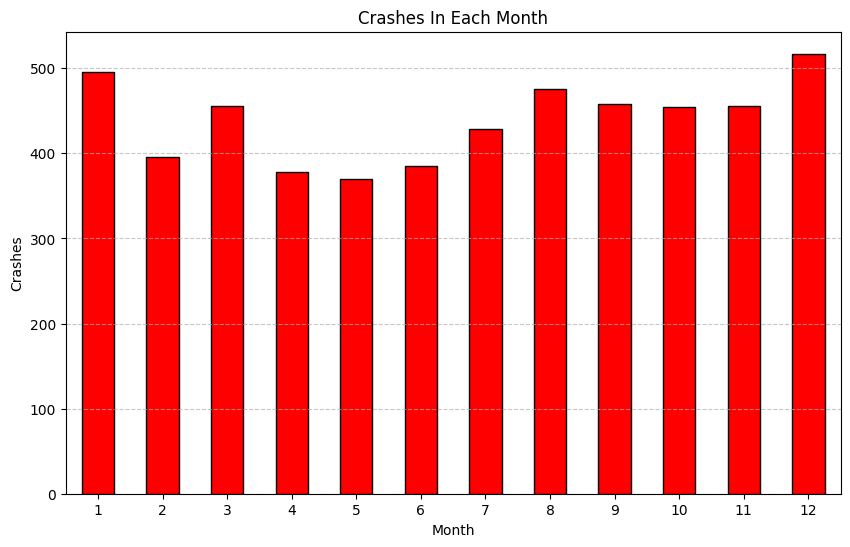

In [90]:
#NUMBER OF CRASHES IN EACH MONTH

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month

# Count occurrences of each month
month_counts = df['Month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='red', edgecolor='black')

# Customize the plot
plt.title('Crashes In Each Month')
plt.xlabel('Month')
plt.ylabel('Crashes')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#SHOWS MOST DANGEROUS MONTH TO FLY IN

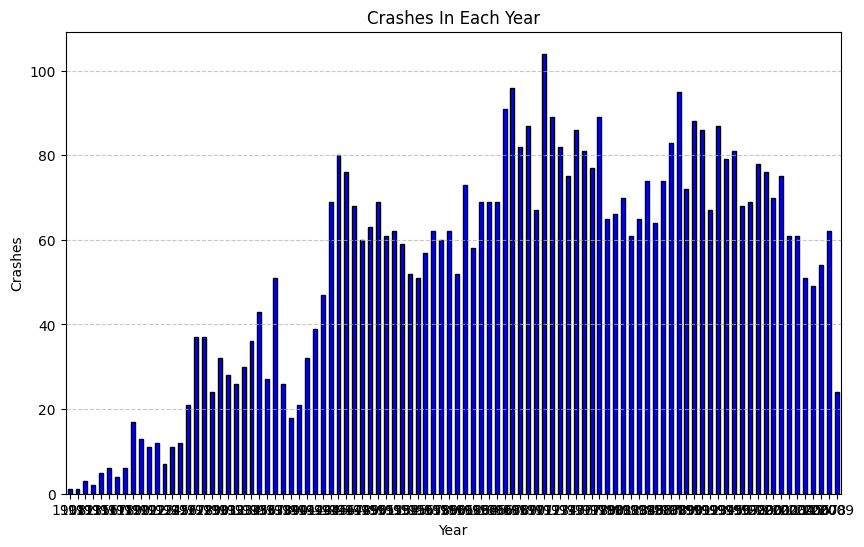

In [91]:
#NUMBER OF CRASHES IN EACH YEAR

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Count occurrences of each year
year_counts = df['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='blue', edgecolor='black')

# Customize the plot
plt.title('Crashes In Each Year')
plt.xlabel('Year')
plt.ylabel('Crashes')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#SHOWS THE FLUCTUATION IN NUMBER OF PLANE CRASHES OVER THE YEARS

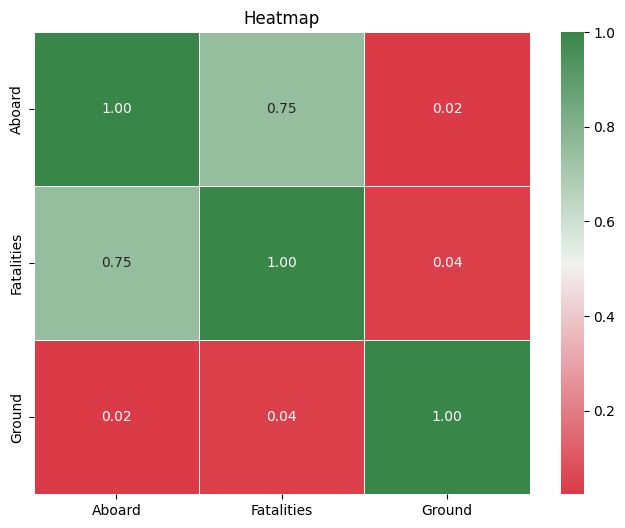

In [92]:
#HEATMAP OF ABOARD VS FATALITIES AND GROUND FATALITIES

# Extract numeric columns for correlation matrix
numeric_columns = df[['Aboard', 'Fatalities', 'Ground']]

# Calculate the correlation matrix
correlation_matrix=numeric_columns.corr()

# Define feature names
custom_feature_names = {
    'Aboard': 'Aboard',
    'Fatalities': 'Fatalities',
    'Ground': 'Ground'
}

# Use custom names for both columns and index
correlation_matrix.columns = [custom_feature_names.get(col, col) for col in correlation_matrix.columns]
correlation_matrix.index = [custom_feature_names.get(index, index) for index in correlation_matrix.index]

# Colormap with red and green
cmap = sns.diverging_palette(10, 133, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.title('Heatmap')
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)
plt.show()

In [93]:
# counting the crashes based on the locations
df.value_counts('Location')

Location
Location Unknown                 20
Sao Paulo, Brazil                15
Moscow, Russia                   15
Rio de Janeiro, Brazil           14
Bogota, Colombia                 13
                                 ..
Mannheim, Germany                 1
Manta, Ecuador                    1
Manus Island, New Guinea          1
Manzanares, Colombia              1
near Orillia, Ontario, Canada     1
Name: count, Length: 4304, dtype: int64

In [95]:
# Calculate crash probabilities based on historical data
total_crashes = len(df)
df = pd.read_csv("C:/Users/Tejas/Desktop/ST_project/all_filled.csv")
df['Date'] = pd.to_datetime(df['Date'])
prob_month = df['Date'].dt.month.value_counts(normalize=True)
prob_time = df['Time'].value_counts(normalize=True)
prob_type = df['Type'].value_counts(normalize=True)

print(prob_type.index)
# Function to predict crash percentage for new input
def predict_crash_percentage(month, time, plane_type):
    if month not in prob_month.index:
        print("Invalid input: Please provide valid month (1-12).")
        return None
    if time not in prob_time.index:
        print("Time out of bound")
        return None
    if plane_type not in prob_type.index:
        print("Plane Type out of bound")
        return None
    # Calculate crash probability for the given input
    crash_percentage = prob_month[month] * prob_time[time] * prob_type[plane_type] * 100
    return crash_percentage

# User input for new plane characteristics
input_month = input("Enter month of takeoff (1-12): ")
input_time = input("Enter time of takeoff (e.g., HH:MM): ")
input_plane_type = input("Enter type of plane: ")

# Convert input_month to integer
try:
    input_month = int(input_month)
except ValueError:
    print("Invalid input: Month must be an integer between 1 and 12.")
    exit(1)

# Predict crash percentage for the input
predicted_percentage = predict_crash_percentage(input_month, input_time, input_plane_type)

if predicted_percentage is not None:
    print(f"Predicted crash percentage for {input_plane_type} taking off in month {input_month} at {input_time}: {predicted_percentage: .6f}%")

Index(['Douglas DC-3', 'de Havilland Canada DHC-6 Twin Otter 300',
       'Douglas C-47A', 'Douglas C-47', 'Douglas DC-4', 'Yakovlev YAK-40',
       'Antonov AN-26', 'Junkers JU-52/3m', 'Douglas C-47B',
       'De Havilland DH-4',
       ...
       'Handley Page HPR-7 Herald 214', 'S2F-1 / HSS-2', 'Douglas C-47A-80-DL',
       'Canadair CL-44D4-1', 'Lockheed L-1649A Starliner', 'Tupolev TU-114B',
       'PBY-5A Catalina', 'NAMC-YS-11-111', 'Lockheed EC-121H',
       'Airbus A330-203'],
      dtype='object', name='Type', length=2446)


Enter month of takeoff (1-12):  1
Enter time of takeoff (e.g., HH:MM):  14:00
Enter type of plane:  Douglas DC-3


Predicted crash percentage for Douglas DC-3 taking off in month 1 at 14:00:  0.046871%
